In [2]:
# Import necessary libraries
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Login to wandb (if not already logged in)
wandb.login()

# Define the project and entity
project_name = "Negatives_final"
entity_name = "ntourne"

# Initialize the wandb API
api = wandb.Api()

# Fetch all runs from the project
runs = api.runs(f"{entity_name}/{project_name}")

wandb: Currently logged in as: ntourne to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
# Initialize a list to store results
results = []

# Iterate through runs and extract metrics
for run in runs:
    # Get the summary metrics, config, and name of the run
    summary = run.summary._json_dict
    config = run.config
    name = run.name
    
    # Combine the data into a single dictionary
    run_data = {
        "run_name": name,
        "TF": config.get("TF"),
        "celltype": config.get("celltype"),
        "neg_mode": config.get("neg_mode"),
        "cross_val_set": config.get("cross_val_set"),
        "group_name": config.get("group_name"),
        "AUROC": summary.get("test_AUROC"),
        "AUROC_HQ": summary.get("test_AUROC_HQ"),
        "val_loss": summary.get("val_loss"),
        "pos_limit": config.get("pos_limit"),
    }
    results.append(run_data)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

In [26]:
results_df = pd.DataFrame(results)
results_df = results_df[results_df['group_name'].isin(["num_pos_run_1"])] # select the right groups
# HQ_results = pd.DataFrame(results)
# HQ_results = HQ_results[HQ_results['group_name'] == "full_run_3_HQ"]
# HQ_results["neg_mode"] = "HQ training"
# HQ_results = HQ_results.rename(columns={"AUROC": "AUROC_HQ", "AUROC_HQ": "AUROC"})
# HQ_results = HQ_results[HQ_results['celltype'].isin(['A549', 'GM12878', 'K562', 'HepG2'])] # only the right celltypes
# # Merge results_df with HQ_results, aligning columns as needed
# results_df = pd.concat([results_df, HQ_results], ignore_index=True)

In [27]:
results_df

,run_name,TF,celltype,neg_mode,cross_val_set,group_name,AUROC,AUROC_HQ,val_loss,pos_limit
4320,HepG2_USF-1_CV3_20250801_12:23,USF-1,HepG2,dinucl_sampled,3,num_pos_run_1,0.781786,0.704377,0.763240,200.0
4321,HepG2_USF-1_CV0_20250801_12:23,USF-1,HepG2,dinucl_sampled,0,num_pos_run_1,0.740115,0.651371,0.714109,200.0
4322,HepG2_USF-1_CV2_20250801_12:23,USF-1,HepG2,dinucl_sampled,2,num_pos_run_1,0.837026,0.810775,0.533292,200.0
4323,HepG2_USF-1_CV1_20250801_12:23,USF-1,HepG2,dinucl_sampled,1,num_pos_run_1,0.889271,0.845120,0.680313,200.0
4324,HepG2_USF-1_CV4_20250801_12:51,USF-1,HepG2,dinucl_sampled,4,num_pos_run_1,0.885871,0.841616,0.783926,200.0
...,...,...,...,...,...,...,...,...,...,...
8337,HepG2_Mxi1_(AF4185)_CV1_20250814_23:29,Mxi1_(AF4185),HepG2,celltype,1,num_pos_run_1,0.584691,0.607530,1.690932,10000.0
8338,HepG2_Mxi1_(AF4185)_CV2_20250814_23:30,Mxi1_(AF4185),HepG2,celltype,2,num_pos_run_1,0.542874,0.549423,1.134084,10000.0
8339,HepG2_Mxi1_(AF4185)_CV3_20250814_23:32,Mxi1_(AF4185),HepG2,celltype,3,num_pos_run_1,0.561394,0.603236,0.808798,10000.0
8340,HepG2_Mxi1_(AF4185)_CV4_20250814_23:36,Mxi1_(AF4185),HepG2,celltype,4,num_pos_run_1,0.577747,0.545719,1.260438,10000.0


In [28]:
# Check the amount of entries for each combination of TF, celltype, and neg_mode
combination_counts = results_df.groupby(['TF', 'celltype', 'neg_mode']).size().reset_index(name='count')
print(f"Total combinations: {len(combination_counts)}")
print(f"Count distribution:")
print(combination_counts['count'].value_counts().sort_index())
print(combination_counts)

Total combinations: 50
Count distribution:
count
50     1
60     2
61     1
64     2
73     1
80     3
82     2
83     6
84    32
Name: count, dtype: int64
                   TF celltype         neg_mode  count
0                CTCF    HepG2         celltype     83
1                CTCF    HepG2   dinucl_sampled     60
2                CTCF    HepG2  dinucl_shuffled     84
3                CTCF    HepG2        neighbors     84
4                CTCF    HepG2         shuffled     84
5       ELF1_(SC-631)    HepG2         celltype     80
6       ELF1_(SC-631)    HepG2   dinucl_sampled     64
7       ELF1_(SC-631)    HepG2  dinucl_shuffled     84
8       ELF1_(SC-631)    HepG2        neighbors     84
9       ELF1_(SC-631)    HepG2         shuffled     84
10              FOSL2    HepG2         celltype     83
11              FOSL2    HepG2   dinucl_sampled     64
12              FOSL2    HepG2  dinucl_shuffled     84
13              FOSL2    HepG2        neighbors     84
14              FOS

In [29]:
# Check the amount of entries for each combination of TF, celltype, neg_mode, and cross_val_set
combination_counts_cv = results_df.groupby(['TF', 'celltype', 'neg_mode', 'cross_val_set']).size().reset_index(name='count')
print(f"Total combinations with CV: {len(combination_counts_cv)}")
print(f"Count distribution:")
print(combination_counts_cv['count'].value_counts().sort_index())
print(combination_counts_cv)

Total combinations with CV: 300
Count distribution:
count
7       4
9       8
10     12
11      7
12      9
13     23
14    237
Name: count, dtype: int64
        TF celltype  neg_mode  cross_val_set  count
0     CTCF    HepG2  celltype              0     13
1     CTCF    HepG2  celltype              1     14
2     CTCF    HepG2  celltype              2     14
3     CTCF    HepG2  celltype              3     14
4     CTCF    HepG2  celltype              4     14
..     ...      ...       ...            ...    ...
295  USF-1    HepG2  shuffled              1     14
296  USF-1    HepG2  shuffled              2     14
297  USF-1    HepG2  shuffled              3     14
298  USF-1    HepG2  shuffled              4     14
299  USF-1    HepG2  shuffled              5     14

[300 rows x 5 columns]


In [34]:
tf_min_positives = [
    ('MafK_(ab50322)', 14790),
    ('CTCF', 14192),
    ('FOXA1_(SC-101058)', 11540),
    ('MafF_(M8194)', 9054),
    ('JunD', 7888),
    ('SP1', 7249),
    ('FOSL2', 6745),
    ('USF-1', 6098),
    ('Mxi1_(AF4185)', 5564),
    ('ELF1_(SC-631)', 4968)
]

In [35]:
# Create a dictionary for quick lookup of minimum positives per TF
tf_min_dict = dict(tf_min_positives)

# Filter out rows where pos_limit exceeds the minimum positives for that TF
results_df_filtered = results_df[
    results_df.apply(lambda row: row['pos_limit'] <= tf_min_dict.get(row['TF'], float('inf')), axis=1)
]

print(f"Original data shape: {results_df.shape}")
print(f"Filtered data shape: {results_df_filtered.shape}")
print(f"Rows removed: {results_df.shape[0] - results_df_filtered.shape[0]}")

# Update results_df to the filtered version
results_df = results_df_filtered

Original data shape: (3322, 10)
Filtered data shape: (3322, 10)
Rows removed: 0


In [36]:
# Average the scores per TF-celltype-neg_mode combination over different cross_val_sets
averaged_results = results_df.groupby(['TF', 'celltype', 'neg_mode', 'pos_limit']).agg({
    'AUROC': 'mean',
    'AUROC_HQ': 'mean',
    'val_loss': 'mean'
}).reset_index()

# Display the averaged results
print(f"Original data shape: {results_df.shape}")
print(f"Averaged data shape: {averaged_results.shape}")
averaged_results.head()

Original data shape: (3322, 10)
Averaged data shape: (559, 7)


,TF,celltype,neg_mode,pos_limit,AUROC,AUROC_HQ,val_loss
0,CTCF,HepG2,celltype,200.0,0.809468,0.790428,1.081267
1,CTCF,HepG2,celltype,300.0,0.809482,0.779972,0.719600
2,CTCF,HepG2,celltype,500.0,0.831145,0.804274,0.913256
3,CTCF,HepG2,celltype,1000.0,0.847580,0.816216,0.983159
4,CTCF,HepG2,celltype,1500.0,0.912635,0.890370,0.723779


In [37]:
results_df

,run_name,TF,celltype,neg_mode,cross_val_set,group_name,AUROC,AUROC_HQ,val_loss,pos_limit
4320,HepG2_USF-1_CV3_20250801_12:23,USF-1,HepG2,dinucl_sampled,3,num_pos_run_1,0.781786,0.704377,0.763240,200.0
4321,HepG2_USF-1_CV0_20250801_12:23,USF-1,HepG2,dinucl_sampled,0,num_pos_run_1,0.740115,0.651371,0.714109,200.0
4322,HepG2_USF-1_CV2_20250801_12:23,USF-1,HepG2,dinucl_sampled,2,num_pos_run_1,0.837026,0.810775,0.533292,200.0
4323,HepG2_USF-1_CV1_20250801_12:23,USF-1,HepG2,dinucl_sampled,1,num_pos_run_1,0.889271,0.845120,0.680313,200.0
4324,HepG2_USF-1_CV4_20250801_12:51,USF-1,HepG2,dinucl_sampled,4,num_pos_run_1,0.885871,0.841616,0.783926,200.0
...,...,...,...,...,...,...,...,...,...,...
8311,HepG2_Mxi1_(AF4185)_CV1_20250814_22:31,Mxi1_(AF4185),HepG2,celltype,1,num_pos_run_1,0.572310,0.566108,1.486259,5000.0
8312,HepG2_Mxi1_(AF4185)_CV2_20250814_22:35,Mxi1_(AF4185),HepG2,celltype,2,num_pos_run_1,0.560561,0.615990,0.958877,5000.0
8313,HepG2_Mxi1_(AF4185)_CV3_20250814_22:35,Mxi1_(AF4185),HepG2,celltype,3,num_pos_run_1,0.562145,0.587066,1.658074,5000.0
8314,HepG2_Mxi1_(AF4185)_CV4_20250814_22:41,Mxi1_(AF4185),HepG2,celltype,4,num_pos_run_1,0.575318,0.571244,1.423456,5000.0


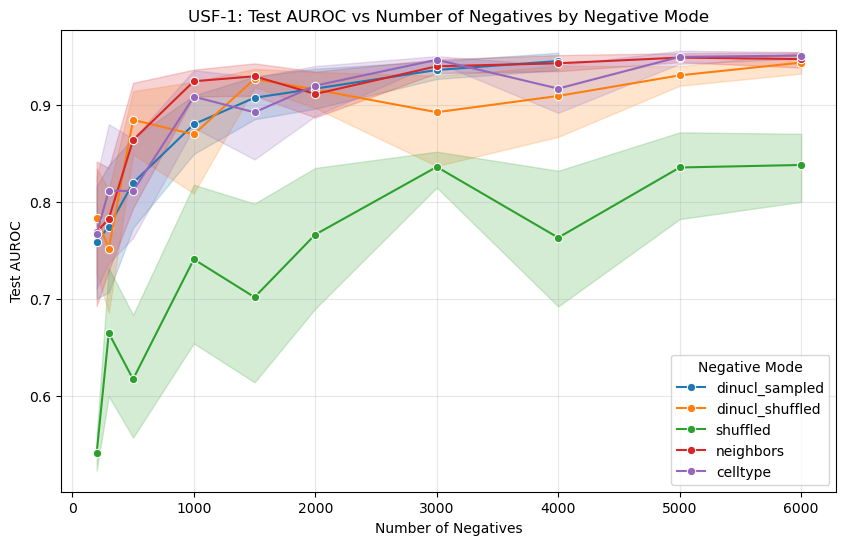

In [38]:
# Filter data for USF-1
usf1_data = results_df[results_df['TF'] == 'USF-1'].copy()

# Calculate the number of negatives for each cross-validation set
# Based on the combination_counts_cv, we can see the count for each CV set
usf1_with_negatives = usf1_data.merge(
    combination_counts_cv[combination_counts_cv['TF'] == 'USF-1'][['neg_mode', 'cross_val_set', 'count']],
    on=['neg_mode', 'cross_val_set'],
    how='left'
)

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=usf1_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', marker='o')
plt.xlabel('Number of Negatives')
plt.ylabel('Test AUROC')
plt.title('USF-1: Test AUROC vs Number of Negatives by Negative Mode')
plt.legend(title='Negative Mode')
plt.grid(True, alpha=0.3)
plt.show()

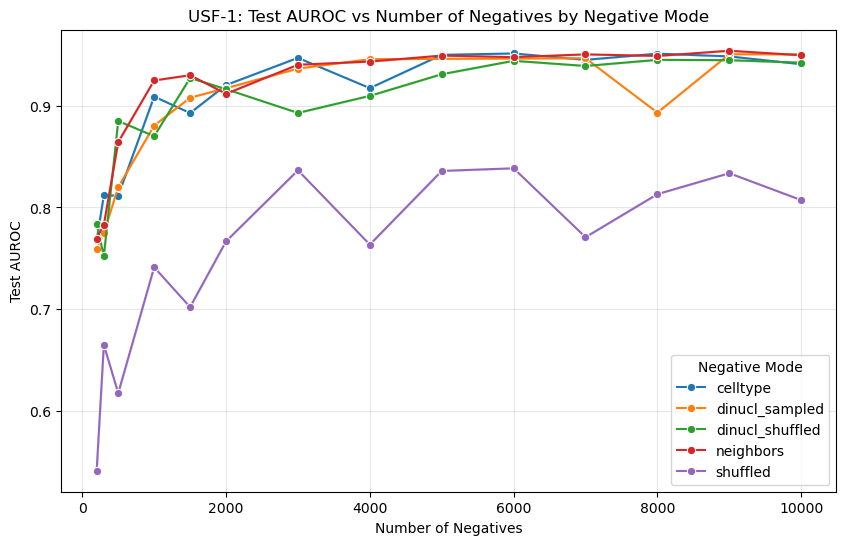

In [15]:
# Filter data for USF-1
usf1_data = averaged_results[averaged_results['TF'] == 'USF-1'].copy()

# Calculate the number of negatives for each cross-validation set
# Based on the combination_counts_cv, we can see the count for each CV set
usf1_with_negatives = usf1_data.merge(
    combination_counts_cv[combination_counts_cv['TF'] == 'USF-1'][['neg_mode', 'count']],
    on=['neg_mode'],
    how='left'
)

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=usf1_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', marker='o')
plt.xlabel('Number of Negatives')
plt.ylabel('Test AUROC')
plt.title('USF-1: Test AUROC vs Number of Negatives by Negative Mode')
plt.legend(title='Negative Mode')
plt.grid(True, alpha=0.3)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


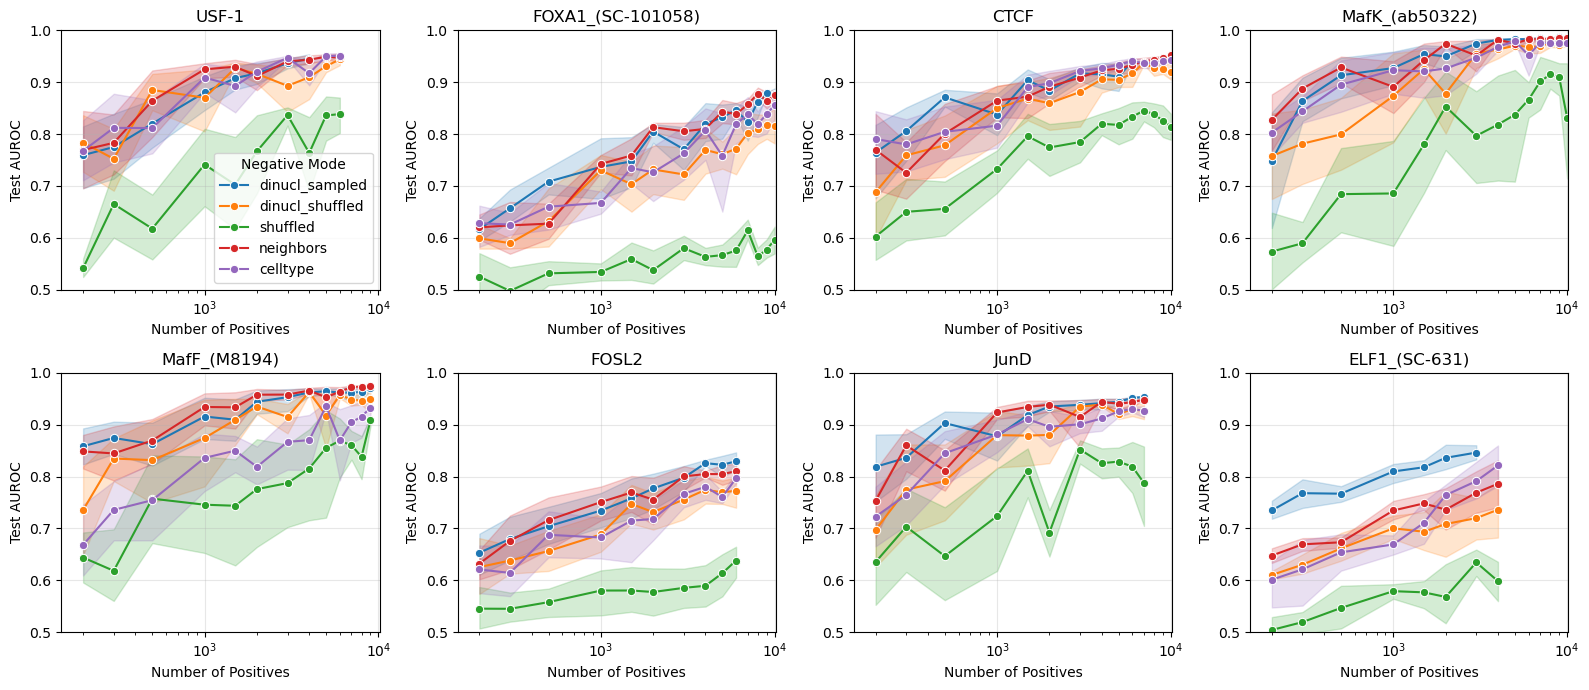

In [40]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = results_df[results_df['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'cross_val_set', 'count']],
        on=['neg_mode', 'cross_val_set'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_xlim(150, 10150)
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


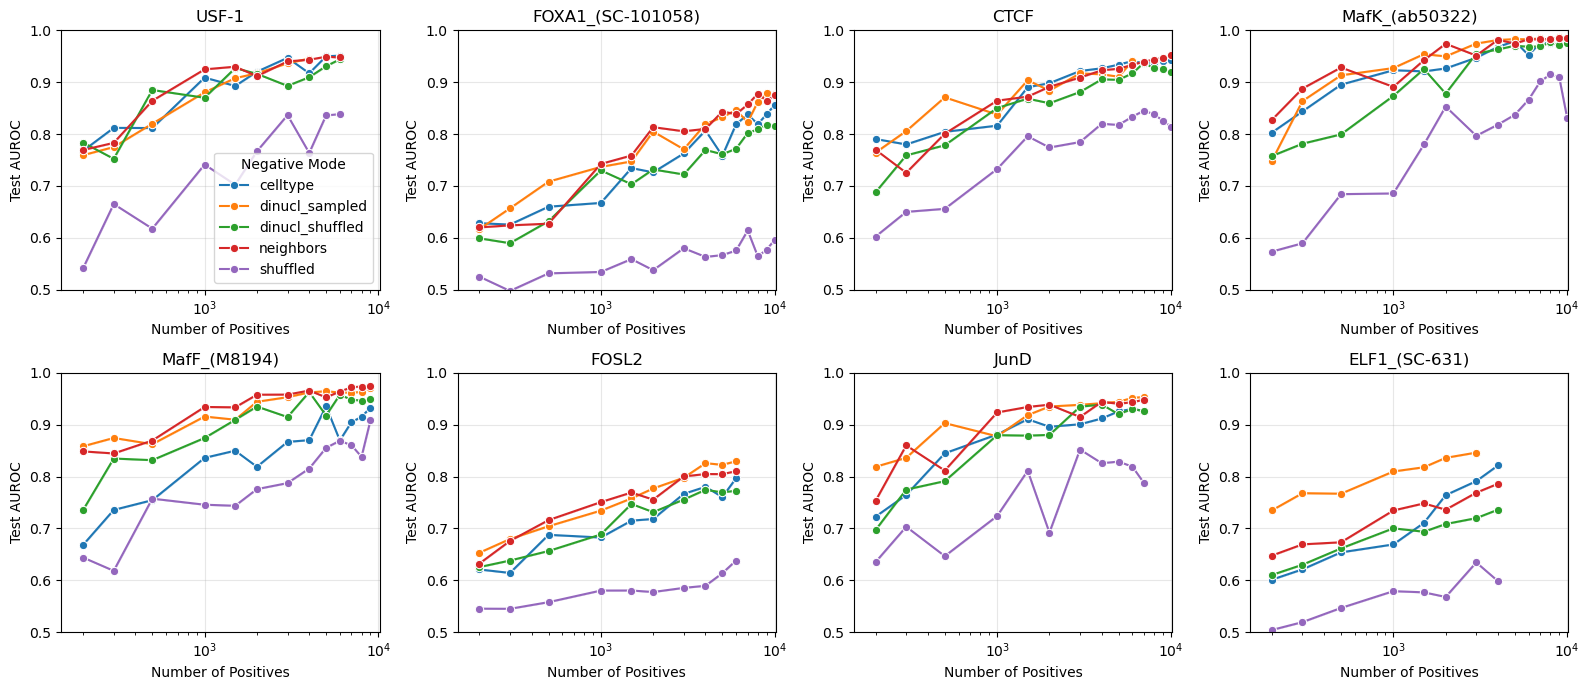

In [41]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = averaged_results[averaged_results['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'count']],
        on=['neg_mode'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_xlim(150, 10150)
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


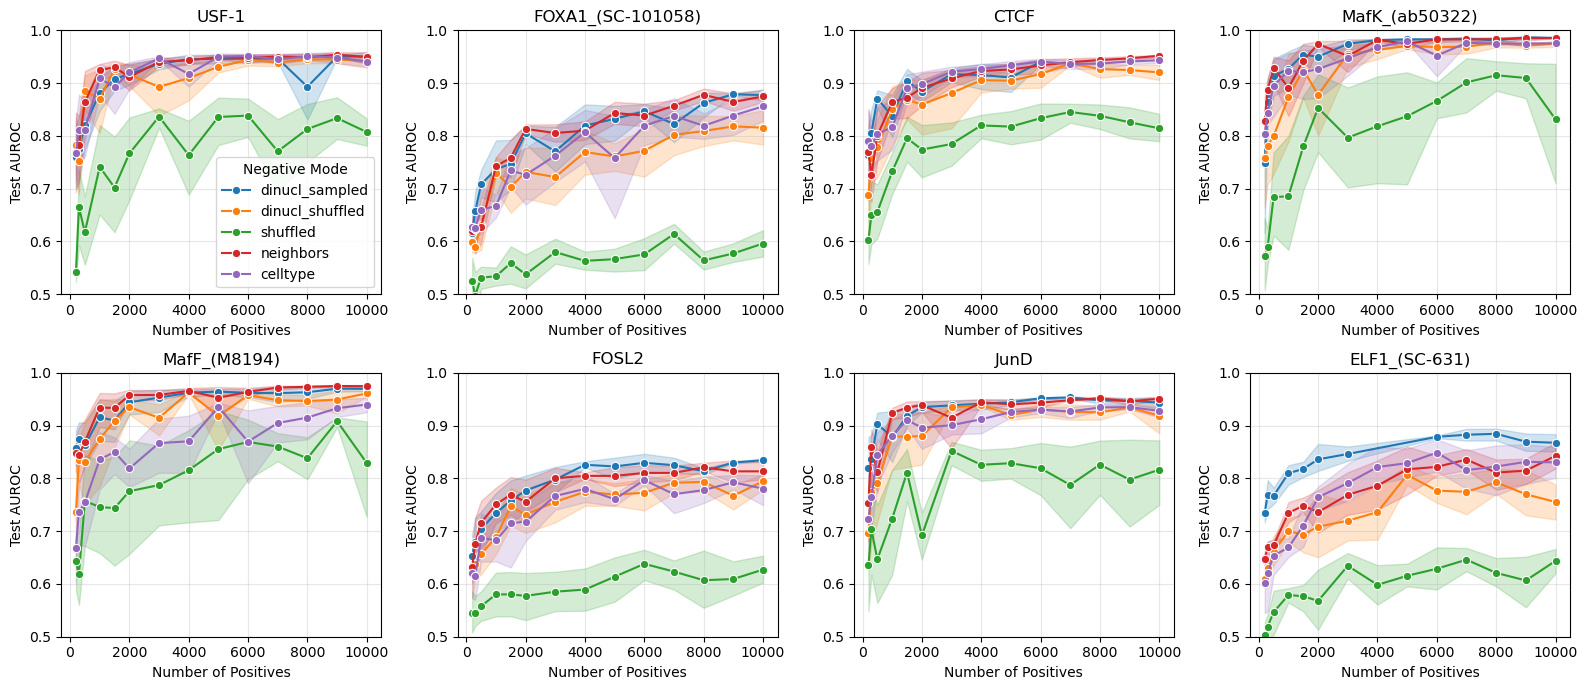

In [25]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = results_df[results_df['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'cross_val_set', 'count']],
        on=['neg_mode', 'cross_val_set'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    #axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
#plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()